<a href="https://colab.research.google.com/github/mittelmanjournal/NFL-Neural-Network-Project/blob/main/Unoptimized_NFL_neural_net_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[MPG Regression for car data](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb)


[Fashion image classification neural network](https://colab.research.google.com/github/mmphego/TensorFlow-Course/blob/master/fashion_mnist.ipynb)

Above are the two Google Colab pages that I read through to understand how to create my own network.

# **Import necessary libraries**

This code sets up the basics for machine learning in a Google Colaboratory notebook. It imports TensorFlow, a powerful machine learning library, along with NumPy for numerical operations, Matplotlib for plotting, and Pandas for data manipulation. The last line prints the TensorFlow version, useful for checking compatibility and features. Overall, it's a starting point for machine learning tasks, ensuring the necessary tools are available.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io

print(tf.__version__)


2.15.0


#**Copy the dataset into the workspace**
and then get all of the feature/column names from the first line in the dataset.
The class names (the different ways the neural net can "interpret" the input) are simply "away win", "tie", "home win". Then drop the first row from the dataset because these are the column names we already saved.
<P>The first column in the dataset as we see it printed below represents the TRUE/ACTUAL output given that input, where 0 represents away win, 1 represents tie and 2 represents home win</P>


In [4]:
#upload the file to this path, drag and drop dataset
file_path = '/content/sample_data/dataset.csv'
# Specify skiprows=1 to skip the first row (header) since we will use it as column names
raw_dataset = pd.read_csv(file_path, na_values='?', comment='\t',
                          sep=',', skipinitialspace=True, skiprows=0)

# The column names are automatically inferred from the header row
column_names = raw_dataset.columns.tolist()
class_names = ['away win','tie','home win']

raw_dataset.drop(index=0)

,winner,seasonWeek,seasonYear,weekday,monthDay,month,year,militaryTime,stadium,field,...,home_K_fgm_20-29_pg,home_K_fga_30-39_pg,home_K_fgm_30-39_pg,home_K_fga_40-49_pg,home_K_fgm_40-49_pg,home_K_fga_50+_pg,home_K_fgm_50+_pg,home_K_fglng_ps,home_K_xpa_pg,home_K_xpm_pg
1,2,1,2002,0,8,0,2002,1304,3,0,...,0.421384,0.610063,0.528302,0.503145,0.364780,0.251572,0.132075,52.100000,1.767296,1.723270
2,2,1,2002,0,8,0,2002,1304,3,2,...,0.333333,0.545455,0.454545,0.787879,0.575758,0.060606,0.060606,51.000000,1.727273,1.727273
3,0,1,2002,0,8,0,2002,1304,3,0,...,0.340426,0.404255,0.340426,0.340426,0.191489,0.000000,0.000000,47.333333,1.510638,1.468085
4,2,1,2002,0,8,0,2002,1304,3,0,...,0.441860,0.674419,0.593023,0.651163,0.476744,0.151163,0.069767,50.200000,2.546512,2.500000
5,0,1,2002,0,8,0,2002,1304,3,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,2,19,2021,6,15,4,2022,2015,3,3,...,0.631579,0.473684,0.315789,0.631579,0.473684,0.473684,0.368421,58.000000,5.684211,5.526316
5229,2,19,2021,0,16,4,2022,1300,3,0,...,0.389474,0.510526,0.473684,0.600000,0.457895,0.210526,0.115789,50.583333,2.489474,2.389474
5230,0,19,2021,0,16,4,2022,1640,1,-1,...,0.405797,0.659420,0.608696,0.550725,0.434783,0.485507,0.275362,57.111111,2.572464,2.463768
5231,2,19,2021,0,16,4,2022,2015,3,0,...,0.500000,0.685714,0.642857,0.585714,0.500000,0.300000,0.214286,55.250000,4.028571,3.785714


In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,winner,seasonWeek,seasonYear,weekday,monthDay,month,year,militaryTime,stadium,field,...,home_K_fgm_20-29_pg,home_K_fga_30-39_pg,home_K_fgm_30-39_pg,home_K_fga_40-49_pg,home_K_fgm_40-49_pg,home_K_fga_50+_pg,home_K_fgm_50+_pg,home_K_fglng_ps,home_K_xpa_pg,home_K_xpm_pg
5228,2,19,2021,6,15,4,2022,2015,3,3,...,0.631579,0.473684,0.315789,0.631579,0.473684,0.473684,0.368421,58.000000,5.684211,5.526316
5229,2,19,2021,0,16,4,2022,1300,3,0,...,0.389474,0.510526,0.473684,0.600000,0.457895,0.210526,0.115789,50.583333,2.489474,2.389474
5230,0,19,2021,0,16,4,2022,1640,1,-1,...,0.405797,0.659420,0.608696,0.550725,0.434783,0.485507,0.275362,57.111111,2.572464,2.463768
5231,2,19,2021,0,16,4,2022,2015,3,0,...,0.500000,0.685714,0.642857,0.585714,0.500000,0.300000,0.214286,55.250000,4.028571,3.785714
5232,2,19,2021,1,17,4,2022,2015,0,-1,...,0.320000,0.640000,0.520000,0.880000,0.720000,0.360000,0.240000,54.500000,4.520000,4.280000


# **Drop any "bad" values**

In [6]:
dataset.isna().sum()

winner               0
seasonWeek           0
seasonYear           0
weekday              0
monthDay             0
                    ..
home_K_fga_50+_pg    0
home_K_fgm_50+_pg    0
home_K_fglng_ps      0
home_K_xpa_pg        0
home_K_xpm_pg        0
Length: 702, dtype: int64

In [7]:
dataset = dataset.dropna()

In [9]:
dataset.tail() # can also do dataset.head() to see front

,winner,seasonWeek,seasonYear,weekday,monthDay,month,year,militaryTime,stadium,field,...,home_K_fgm_20-29_pg,home_K_fga_30-39_pg,home_K_fgm_30-39_pg,home_K_fga_40-49_pg,home_K_fgm_40-49_pg,home_K_fga_50+_pg,home_K_fgm_50+_pg,home_K_fglng_ps,home_K_xpa_pg,home_K_xpm_pg
5228,2,19,2021,6,15,4,2022,2015,3,3,...,0.631579,0.473684,0.315789,0.631579,0.473684,0.473684,0.368421,58.000000,5.684211,5.526316
5229,2,19,2021,0,16,4,2022,1300,3,0,...,0.389474,0.510526,0.473684,0.600000,0.457895,0.210526,0.115789,50.583333,2.489474,2.389474
5230,0,19,2021,0,16,4,2022,1640,1,-1,...,0.405797,0.659420,0.608696,0.550725,0.434783,0.485507,0.275362,57.111111,2.572464,2.463768
5231,2,19,2021,0,16,4,2022,2015,3,0,...,0.500000,0.685714,0.642857,0.585714,0.500000,0.300000,0.214286,55.250000,4.028571,3.785714
5232,2,19,2021,1,17,4,2022,2015,0,-1,...,0.320000,0.640000,0.520000,0.880000,0.720000,0.360000,0.240000,54.500000,4.520000,4.280000


# **80% of the dataset will be used for training and 20% will be used to test how well the neural net can generalize to data it hasn't seen before**

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
winner,4186.0,1.141185,0.989015,0.0,0.000000,2.000000,2.000000,2.0
seasonWeek,4186.0,9.342570,5.277457,1.0,5.000000,9.000000,14.000000,21.0
seasonYear,4186.0,2012.384615,6.346596,2002.0,2007.000000,2012.000000,2018.000000,2023.0
weekday,4186.0,0.454849,1.353606,0.0,0.000000,0.000000,0.000000,6.0
monthDay,4186.0,15.794314,8.666252,1.0,9.000000,16.000000,23.000000,31.0
...,...,...,...,...,...,...,...,...
home_K_fga_50+_pg,4186.0,0.185284,0.134692,0.0,0.104265,0.178759,0.270588,2.0
home_K_fgm_50+_pg,4186.0,0.108272,0.090102,0.0,0.048913,0.096154,0.153846,1.0
home_K_fglng_ps,4186.0,42.153775,19.773753,0.0,46.125000,50.900000,53.000000,62.0
home_K_xpa_pg,4186.0,2.166116,1.257211,0.0,1.976870,2.333333,2.700000,20.0


# **Split the data into the inputs/features and the outputs/labels of each input**

for both the test and training data

In [12]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('winner')
test_labels = test_features.pop('winner')

train_features.tail()

,seasonWeek,seasonYear,weekday,monthDay,month,year,militaryTime,stadium,field,visSeasonWinsComingIntoGame,...,home_K_fgm_20-29_pg,home_K_fga_30-39_pg,home_K_fgm_30-39_pg,home_K_fga_40-49_pg,home_K_fgm_40-49_pg,home_K_fga_50+_pg,home_K_fgm_50+_pg,home_K_fglng_ps,home_K_xpa_pg,home_K_xpm_pg
3483,5,2017,0,8,1,2017,1300,3,0,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1591,13,2008,0,30,2,2008,1302,3,0,6,...,0.407407,0.567901,0.493827,0.506173,0.382716,0.086420,0.024691,50.333333,2.234568,2.197531
3727,5,2018,0,7,1,2018,1625,3,0,2,...,0.388889,0.500000,0.333333,0.833333,0.777778,0.388889,0.333333,61.000000,3.277778,3.000000
3863,16,2018,6,22,3,2018,1630,3,0,7,...,0.378378,0.472973,0.425676,0.628378,0.500000,0.216216,0.114865,52.222222,2.216216,2.162162
1876,17,2009,0,3,4,2010,1304,3,0,13,...,0.460076,0.555133,0.494297,0.524715,0.391635,0.277567,0.144487,50.823529,2.034221,1.988593


In [13]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
winner,1.141185,0.989015
seasonWeek,9.342570,5.277457
seasonYear,2012.384615,6.346596
weekday,0.454849,1.353606
monthDay,15.794314,8.666252
...,...,...
home_K_fga_50+_pg,0.185284,0.134692
home_K_fgm_50+_pg,0.108272,0.090102
home_K_fglng_ps,42.153775,19.773753
home_K_xpa_pg,2.166116,1.257211


# **Normalize training features**

each feature/column's values are all normalized with a mean of 0 and a standard deviation of 1 (done because parameter axis=-1), read more [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization)

In [14]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [15]:
normalizer.adapt(np.array(train_features))

In [16]:
print(normalizer.mean.numpy())

[[9.34256744e+00 2.01238477e+03 4.54849511e-01 1.57943153e+01
  1.73124623e+00 2.01245288e+03 1.51749573e+03 2.32513189e+00
  2.20950770e+00 4.43358612e+00 4.28045702e+00 2.93836631e-02
  9.10601654e+01 5.18459091e+01 3.90379982e+01 1.76301911e-01
  7.19213963e-01 2.74335861e-01 4.43345696e-01 5.91065502e+00
  3.26684093e+00 2.64381242e+00 2.10099459e+00 9.75871801e-01
  1.90942139e+02 1.01315109e+02 2.86813164e+01 5.23647881e+01
  7.05716782e+01 3.73019600e+01 2.79049206e+01 1.20879091e-01
  1.92661591e+01 3.15387325e+01 2.23488937e+02 1.38432479e+00
  8.73745620e-01 8.70491886e+00 3.76401825e+01 5.45011978e+01
  2.14167905e+00 1.39274435e+01 1.32018551e-01 3.19696164e+00
  1.35517206e+01 1.83017895e-01 8.43762517e-01 3.47252083e+01
  1.68324394e+01 5.33862293e-01 1.80491379e+02 9.85998764e+01
  2.60011883e+01 2.75948353e+01 5.06925316e+01 3.33793488e+01
  3.05817771e+00 2.26232314e+00 1.86626892e+01 7.43701458e-02
  6.70884311e-01 4.87792740e+01 3.16250381e+01 1.30148888e+01
  5.7079

In [17]:
train_features.tail()

,seasonWeek,seasonYear,weekday,monthDay,month,year,militaryTime,stadium,field,visSeasonWinsComingIntoGame,...,home_K_fgm_20-29_pg,home_K_fga_30-39_pg,home_K_fgm_30-39_pg,home_K_fga_40-49_pg,home_K_fgm_40-49_pg,home_K_fga_50+_pg,home_K_fgm_50+_pg,home_K_fglng_ps,home_K_xpa_pg,home_K_xpm_pg
3483,5,2017,0,8,1,2017,1300,3,0,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1591,13,2008,0,30,2,2008,1302,3,0,6,...,0.407407,0.567901,0.493827,0.506173,0.382716,0.086420,0.024691,50.333333,2.234568,2.197531
3727,5,2018,0,7,1,2018,1625,3,0,2,...,0.388889,0.500000,0.333333,0.833333,0.777778,0.388889,0.333333,61.000000,3.277778,3.000000
3863,16,2018,6,22,3,2018,1630,3,0,7,...,0.378378,0.472973,0.425676,0.628378,0.500000,0.216216,0.114865,52.222222,2.216216,2.162162
1876,17,2009,0,3,4,2010,1304,3,0,13,...,0.460076,0.555133,0.494297,0.524715,0.391635,0.277567,0.144487,50.823529,2.034221,1.988593


In [18]:
print(len(train_labels))
print(len(train_features))

4186
4186


Each label is an integer between 0 and 2:

In [19]:
train_labels

2831    0
4377    0
2557    2
1977    2
4477    2
       ..
3483    0
1591    2
3727    0
3863    2
1876    2
Name: winner, Length: 4186, dtype: int64

In [20]:
print(len(test_labels))
print(len(test_features))

1047
1047


# **Setup neural network's layers**

Arbitrary layer setup, will use hyper parameter tuning (must learn how to do this) later to try to optimize layer structure, optimization algorithm (currently using adam), loss function (currently using SparseCategoricalCrossentropy) and other hyper parameters.

In [21]:
def build_and_compile_model(norm):
    model = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(2800, activation='relu'),
        tf.keras.layers.Dense(1400, activation='relu'),
        tf.keras.layers.Dense(700, activation='relu'),
        tf.keras.layers.Dense(350, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'), # not half but you get what I mean
        tf.keras.layers.Dense(3)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

Train model given the input of training features, output of training labels, for 60 epochs, with a batch size of 96. Print out info given the Custom Callback class.

In [56]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_batch_end(self, batch, logs=None):
        print(f' Batch {batch}')
        # print(f'Batch {batch}, Loss: {logs["loss"]}, Accuracy: {logs["accuracy"]}')

model = build_and_compile_model(normalizer)

# Example usage with the custom callback
model.fit(train_features, train_labels, epochs=60, batch_size=96, callbacks=[CustomCallback()])

Epoch 1/60
 Batch 0
44/44 [==============================] - 8s 137ms/step - loss: 0.6975 - accuracy: 0.6140
Epoch 2/60
 Batch 0
44/44 [==============================] - 7s 158ms/step - loss: 0.5311 - accuracy: 0.7489
Epoch 3/60
 Batch 0
44/44 [==============================] - 6s 133ms/step - loss: 0.4105 - accuracy: 0.8237
Epoch 4/60
 Batch 0
44/44 [==============================] - 7s 163ms/step - loss: 0.2931 - accuracy: 0.8863
Epoch 5/60
 Batch 0
44/44 [==============================] - 6s 131ms/step - loss: 0.2018 - accuracy: 0.9200
Epoch 6/60
 Batch 0
44/44 [==============================] - 7s 159ms/step - loss: 0.1704 - accuracy: 0.9326
Epoch 7/60
 Batch 0
44/44 [==============================] - 6s 136ms/step - loss: 0.1279 - accuracy: 0.9527
Epoch 8/60
 Batch 0
44/44 [==============================] - 7s 164ms/step - loss: 0.0809 - accuracy: 0.9694
Epoch 9/60
 Batch 0
44/44 [==============================] - 6s 139ms/step - loss: 0.0809 - accuracy: 0.9673
Epoch 10/60
 Batch 

There is probably overfitting going on as the network gets to be almost 100% accurate on the training data. Ways to counter overfitting is to get more data (this is only about 20 years of NFL data, including playoffs), stuff like dropping neurons mid training to decrease reliance on them, regularization which penalizes large weights of neurons in the network, early stopping, PCA, and several other strategies that I still have to research. This is pretty much a vanilla perceptron type network.

# **Evaluate accuracy**

Next, compare how the model performs on the test dataset (data the model hasn't seen before, generalization):

In [57]:
test_loss, test_acc = model.evaluate(test_features,  test_labels, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.7144221663475037


The network is very overfit to the data, must learn and then implement the previously enumerated techniques to reduce this overfitting before using this model to predict next season.

*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [59]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_features)

33/33 [==============================] - 1s 15ms/step


Here, the model has predicted the label for each input in the testing set. Let's take a look at the first prediction:

In [60]:
predictions[4] #[8.0217718e-18 -> away win confidence, 3.4082961e-28 -> tie confidence, 9.9999994e-01 -> home win confidence]

array([8.0217718e-18, 3.4082961e-28, 9.9999994e-01], dtype=float32)

A prediction is an array of 3 numbers. They represent the model's "confidence" that the image corresponds one of the 3 outcomes (away W, tie, home W). You can see which outcome/label has the highest confidence value:

In [61]:
np.argmax(predictions[4])
# 9.9999994e-01 is largest value
# represents home win expected

2

So, the model is most confident that this game input is a home win, or `class_names[2]`. Examining the test label shows that this classification is correct:

In [62]:
test_labels.iloc[4]

2

Define functions to observe the full set of 3 class predictions.

In [63]:
def visualize_input(i, predictions_array, true_label):
    plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Assuming your input is non-image data
    features = test_features.iloc[i]
    max_value = features.max()

    for idx, (feature_name, feature_value) in enumerate(features.items()):
        # Calculate brightness based on the feature value
        brightness = feature_value / max_value

        # Draw a colored box with brightness based on the feature value
        rect = plt.Rectangle((idx / len(features), 0), 1 / len(features), 1, linewidth=0, facecolor=plt.cm.viridis(brightness))
        plt.gca().add_patch(rect)

    predicted_label = np.argmax(predictions_array)
    true_label_color = 'blue' if predicted_label == true_label else 'red'

    # Move the xlabel up slightly for better visibility
    plt.xlabel("Predicted: {} ({:.2%}), True: {}".format(class_names[predicted_label],
                                                           predictions_array[predicted_label],
                                                           class_names[true_label]), color=true_label_color, position=(0, 60), fontsize=16)

def feature_info(i, predictions_array, true_label):
    # Assuming your input is non-image data
    input_str = ", ".join([f"{feature_name}: {feature_value}" for feature_name, feature_value in test_features.iloc[i].items()])
    print(f"Input: \n{input_str}")

    predicted_label = np.argmax(predictions_array)

    class_names = ["Away Win", "Tie", "Home Win"]

    if predicted_label == true_label:
        out = 'correct prediction'
    else:
        out = 'incorrect prediction'

    print(out)
    print("Predicted: {} ({:.2%}), True: {}".format(class_names[predicted_label],
                                                     predictions_array[predicted_label],
                                                     class_names[true_label]))


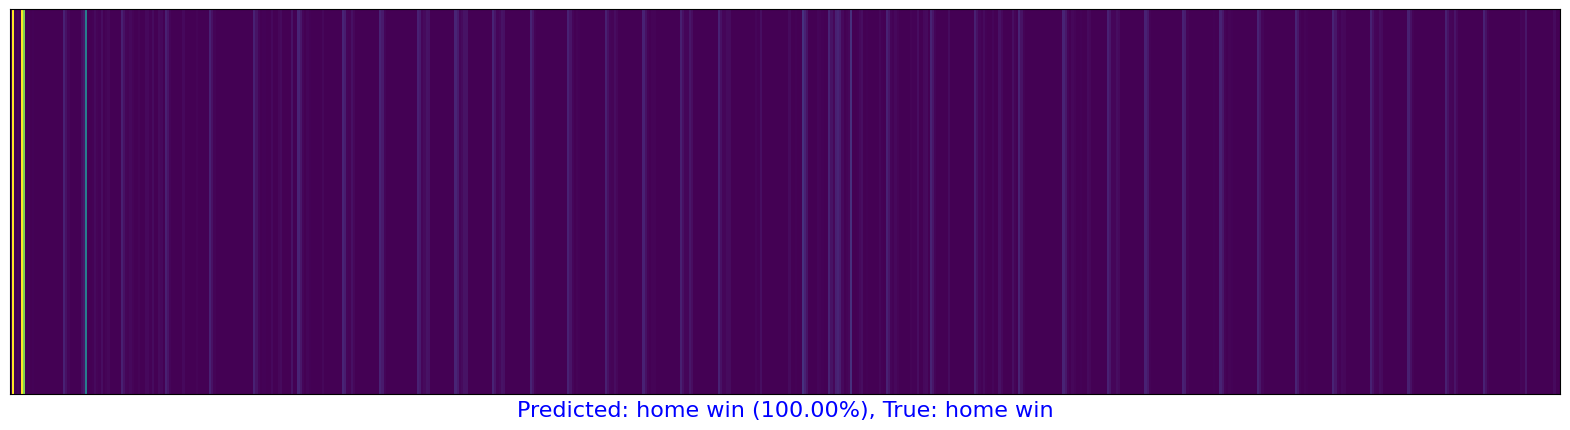

Input: 
seasonWeek: 17.0, seasonYear: 2013.0, weekday: 0.0, monthDay: 29.0, month: 3.0, year: 2013.0, militaryTime: 1625.0, stadium: 3.0, field: 6.0, visSeasonWinsComingIntoGame: 6.0, visSeasonTiesComingIntoGame: 10.0, visSeasonLossesComingIntoGame: 0.0, vis_coach_games: 0.0, vis_coach_wins: 0.0, vis_coach_losses: 0.0, vis_coach_ties: 0.0, vis_coach_mean_SRS: 0.0, vis_coach_mean_OSRS: 0.0, vis_coach_mean_DSRS: 0.0, vis_coach_playoff_games: 0.0, vis_coach_playoff_wins: 0.0, vis_coach_playoff_losses: 0.0, vis_coach_mean_division_placement: 0.0, vis_qb_hand: 1.0, vis_qb_height: 183.0, vis_qb_weight: 90.0, vis_qb_age: 28.0, vis_qb_av: 0.0, vis_qb_games: 1.0, vis_qb_wins: 0.0, vis_qb_losses: 1.0, vis_qb_ties: 0.0, vis_qb_cmp_pg: 78.0, vis_qb_patt_pg: 128.0, vis_qb_pyds_pg: 847.0, vis_qb_ptd_pg: 4.0, vis_qb_int_pg: 3.0, vis_qb_p1D_pg: 12.0, vis_qb_psucc_ps: 54.3, vis_qb_plng_ps: 23.0, vis_qb_sk_pg: 13.0, vis_qb_skyds_pg: 67.0, vis_qb_gwd_pg: 0.0, vis_qb_ratt_pg: 18.0, vis_qb_ryds_pg: 38.0, v

In [64]:
i = 550  # value within test dataset size 1047 im pretty sure
visualize_input(i, predictions[i], test_labels.iloc[i])
plt.show()

feature_info(i, predictions[i], test_labels.iloc[i])

## Use the trained model

Finally, use the trained model to make a prediction about a single game.

In [65]:
def create_dict_from_features(feature_names, feature_values):
    return dict(zip(feature_names, feature_values))

# Example usage
feature_names = column_names[1:]
feature_values = [22,2023,0,11,5,2024,1830,0,0,14,6,0,386.0,247.0,138.0,1.0,4.720833333333333,2.9250000000000003,1.7874999999999996,38.0,22.0,16.0,1.8333333333333333,1.0,188.0,102.0,27.0,94.0,94.0,75.0,19.0,0.0,27.97872340425532,41.97872340425532,334.4148936170213,2.6595744680851063,0.6595744680851063,14.946808510638299,53.050000000000004,73.33333333333333,1.7659574468085106,11.702127659574469,0.19148936170212766,4.4361702127659575,23.28723404255319,0.24468085106382978,1.3936170212765957,45.28333333333333,22.333333333333332,0.44680851063829785,178.0,97.0,27.0,7.0,20.0,14.0,3.55,3.25,23.5,0.1,0.5,135.7,50.0,22.15,104.35,0.8,2.25,105.7,70.0,0.25,188.0,97.0,27.0,5.0,60.0,9.0,2.1333333333333333,1.1333333333333333,17.1,0.11666666666666667,0.5,53.08,27.4,0.0,0.0,0.016666666666666666,0.0,0.0,0.0,0.016666666666666666,193.0,93.0,27.0,26.0,83.0,54.0,4.819277108433735,2.4698795180722892,42.33734939759036,0.2289156626506024,1.5421686746987953,86.42,86.2,0.10843373493975904,0.5783132530120482,0.0,0.03614457831325301,35.0,7.2,0.012048192771084338,188.0,92.0,27.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196.0,113.0,27.0,100.0,162.0,155.0,8.950617283950617,6.5246913580246915,80.74074074074075,0.5740740740740741,3.8950617283950617,111.88000000000002,71.6,0.06172839506172839,0.12962962962962962,0.012345679012345678,0.037037037037037035,45.0,1.3,0.08641975308641975,193.0,119.0,27.0,7.0,20.0,20.0,0.0,0.0,0.55,0.0,0.0,0.875,1.5,2.65,1.9,0.9,0.0,188.0,116.0,27.0,5.0,52.0,7.0,0.0,0.0,0.07692307692307693,0.07692307692307693,0.0,0.3269230769230769,0.8269230769230769,1.4423076923076923,1.2884615384615385,0.3076923076923077,0.0,198.0,140.0,27.0,71.0,122.0,99.0,0.01639344262295082,0.00819672131147541,0.39344262295081966,0.10655737704918032,0.0,0.639344262295082,1.5491803278688525,1.680327868852459,0.8032786885245902,0.6721311475409836,0.00819672131147541,193.0,149.0,27.0,18.0,128.0,20.0,0.0,0.0,0.0390625,0.015625,0.0,0.015625,0.1328125,0.9765625,0.765625,0.0859375,0.0,190.0,113.0,27.0,4.0,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.1,0.15,1.15,0.9,0.2,0.0,188.0,106.0,27.0,14.0,48.0,28.0,0.041666666666666664,0.0,0.16666666666666666,0.041666666666666664,0.0,0.20833333333333334,0.3541666666666667,5.604166666666667,2.5,0.5416666666666666,0.0,180.0,107.0,27.0,13.0,39.0,34.0,0.07692307692307693,0.0,0.2564102564102564,0.02564102564102564,0.05128205128205128,0.05128205128205128,0.2564102564102564,6.538461538461538,4.256410256410256,0.5897435897435898,0.0,185.0,87.0,27.0,14.0,50.0,47.0,0.22,0.0,0.9,0.1,0.0,0.17,0.3,5.44,2.02,0.46,0.0,180.0,87.0,27.0,3.0,14.0,14.0,0.0,0.0,1.5,0.5,0.0,0.2857142857142857,0.6428571428571429,7.357142857142857,2.857142857142857,0.5,0.0,185.0,93.0,27.0,23.0,80.0,76.0,0.1,0.0125,0.5125,0.0375,0.0,0.0875,0.225,4.975,1.75,0.2625,0.0,178.0,92.0,27.0,14.0,65.0,26.0,0.16923076923076924,0.046153846153846156,0.49230769230769234,0.015384615384615385,0.015384615384615385,0.046153846153846156,0.06153846153846154,2.7846153846153845,1.353846153846154,0.15384615384615385,0.0,27.0,22.0,105.0,2.380952380952381,2.1142857142857143,0.01904761904761905,0.01904761904761905,0.45714285714285713,0.45714285714285713,0.6190476190476191,0.580952380952381,0.5333333333333333,0.44761904761904764,0.38095238095238093,0.2571428571428571,56.5,3.723809523809524,3.5238095238095237,14,5,0,98.0,52.0,46.0,0.0,2.516666666666667,1.45,1.05,9.0,6.0,3.0,2.6666666666666665,1.0,185.0,99.0,27.0,6.0,12.0,7.0,1.0,0.0,36.083333333333336,52.416666666666664,490.0833333333333,3.6666666666666665,1.25,7.75,50.3,54.0,3.0833333333333335,19.25,0.16666666666666666,5.5,17.666666666666668,0.5833333333333334,0.6666666666666666,27.3,13.0,0.16666666666666666,180.0,92.0,27.0,63.0,79.0,72.0,8.405063291139241,6.772151898734177,57.43037974683544,0.3924050632911392,2.6455696202531644,74.95,46.333333333333336,17.189873417721518,81.9620253164557,0.7341772151898734,3.0253164556962027,62.76666666666666,56.666666666666664,0.13924050632911392,188.0,106.0,27.0,22.0,166.0,121.0,2.2048192771084336,1.6626506024096386,15.674698795180722,0.10240963855421686,0.6927710843373494,75.57000000000001,40.5,0.4036144578313253,1.4216867469879517,0.030120481927710843,0.18674698795180722,52.5,8.8,0.04819277108433735,183.0,90.0,27.0,24.0,52.0,50.0,8.423076923076923,5.576923076923077,82.21153846153847,0.5,2.673076923076923,96.96666666666668,71.33333333333333,0.25,2.25,0.038461538461538464,0.07692307692307693,68.89999999999999,20.666666666666668,0.07692307692307693,183.0,97.0,27.0,35.0,60.0,52.0,8.233333333333333,5.433333333333334,78.78333333333333,0.35,2.4833333333333334,88.725,91.25,3.4833333333333334,21.45,0.3333333333333333,0.75,97.975,55.25,0.18333333333333332,193.0,113.0,27.0,46.0,91.0,83.0,7.549450549450549,5.395604395604396,73.9010989010989,0.42857142857142855,2.912087912087912,86.43333333333334,68.33333333333333,0.14285714285714285,0.8241758241758241,0.0,0.03296703296703297,73.33333333333333,8.333333333333334,0.04395604395604396,196.0,119.0,27.0,19.0,28.0,27.0,0.0,0.0,0.32142857142857145,0.21428571428571427,0.03571428571428571,0.5892857142857143,1.1428571428571428,2.607142857142857,1.2857142857142858,0.75,0.0,188.0,138.0,27.0,52.0,119.0,104.0,0.0,0.0,0.07563025210084033,0.03361344537815126,0.008403361344537815,0.39915966386554624,0.6890756302521008,1.8739495798319328,1.4789915966386555,0.4957983193277311,0.0,193.0,120.0,27.0,43.0,60.0,58.0,0.016666666666666666,0.0,0.16666666666666666,0.2,0.0,1.0583333333333333,2.683333333333333,3.033333333333333,1.1833333333333333,1.3833333333333333,0.0,201.0,131.0,27.0,42.0,113.0,94.0,0.0,0.0,0.05309734513274336,0.035398230088495575,0.0,0.3584070796460177,0.8849557522123894,1.7433628318584071,1.2123893805309736,0.4247787610619469,0.0,183.0,104.0,27.0,23.0,56.0,48.0,0.08928571428571429,0.017857142857142856,0.30357142857142855,0.05357142857142857,0.017857142857142856,0.0625,0.17857142857142858,6.0,3.1964285714285716,0.39285714285714285,0.0,190.0,104.0,27.0,60.0,90.0,90.0,0.1111111111111111,0.011111111111111112,0.5666666666666667,0.13333333333333333,0.0,0.1,0.3111111111111111,6.088888888888889,3.3555555555555556,0.43333333333333335,0.0,183.0,86.0,27.0,3.0,29.0,7.0,0.06896551724137931,0.0,0.4482758620689655,0.034482758620689655,0.0,0.0,0.0,2.8275862068965516,0.8275862068965517,0.034482758620689655,0.0,185.0,88.0,27.0,20.0,87.0,73.0,0.11494252873563218,0.011494252873563218,0.8735632183908046,0.034482758620689655,0.0,0.011494252873563218,0.034482758620689655,3.9080459770114944,1.3103448275862069,0.09195402298850575,0.0,185.0,96.0,27.0,65.0,164.0,156.0,0.20121951219512196,0.018292682926829267,0.4268292682926829,0.018292682926829267,0.0,0.021341463414634148,0.042682926829268296,3.152439024390244,1.2073170731707317,0.11585365853658537,0.0,180.0,91.0,27.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,178.0,90.0,27.0,6.0,33.0,18.0,0.18181818181818182,0.0,0.5757575757575758,0.0,0.0,0.030303030303030304,0.06060606060606061,4.363636363636363,1.9090909090909092,0.24242424242424243,0.0,27.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]



In [67]:
# Grab an image from the test dataset.
# singleGame = test_features.iloc[500]

# print(singleGame.shape)
# print(singleGame)


singleGame_data = create_dict_from_features(feature_names, feature_values)
singleGame = pd.Series(singleGame_data)

print(singleGame.shape)
print(singleGame)




(701,)
seasonWeek             22.0
seasonYear           2023.0
weekday                 0.0
monthDay               11.0
month                   5.0
                      ...  
home_K_fga_50+_pg       0.0
home_K_fgm_50+_pg       0.0
home_K_fglng_ps         0.0
home_K_xpa_pg           0.0
home_K_xpm_pg           0.0
Length: 701, dtype: float64


In [68]:
# Add the image to a batch where it's the only member.
singleGame = (np.expand_dims(singleGame,0))

print(singleGame.shape)

(1, 701)


Now predict the correct label for this game:

In [69]:
predictions_single = probability_model.predict(singleGame)

print(predictions_single)

1/1 [==============================] - 0s 91ms/step
[[3.9240393e-07 9.2317113e-15 9.9999964e-01]]


`tf.keras.Model.predict` returns a list of lists—one list for each game input in the batch of data. Grab the predictions for our (only) game in the batch:

In [70]:
np.argmax(predictions_single[0])

2

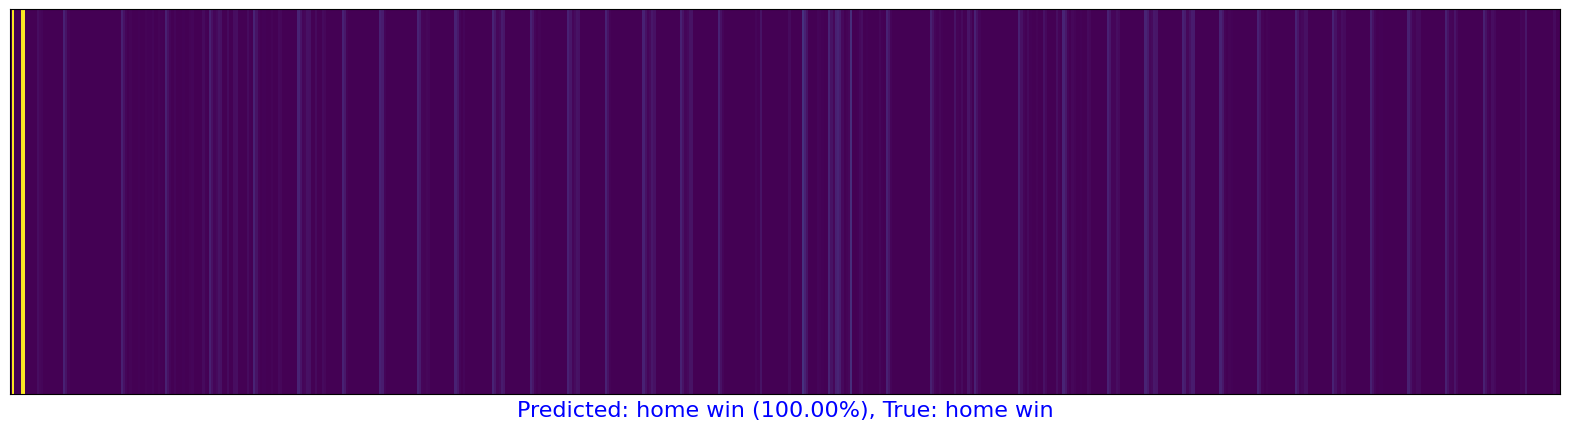

Input: 
seasonWeek: 2.0, seasonYear: 2013.0, weekday: 4.0, monthDay: 12.0, month: 0.0, year: 2013.0, militaryTime: 2029.0, stadium: 3.0, field: 6.0, visSeasonWinsComingIntoGame: 1.0, visSeasonTiesComingIntoGame: 1.0, visSeasonLossesComingIntoGame: 0.0, vis_coach_games: 64.0, vis_coach_wins: 34.0, vis_coach_losses: 30.0, vis_coach_ties: 0.0, vis_coach_mean_SRS: 2.525, vis_coach_mean_OSRS: -0.1499999999999999, vis_coach_mean_DSRS: 2.625, vis_coach_playoff_games: 6.0, vis_coach_playoff_wins: 4.0, vis_coach_playoff_losses: 2.0, vis_coach_mean_division_placement: 2.25, vis_qb_hand: 1.0, vis_qb_height: 190.0, vis_qb_weight: 100.0, vis_qb_age: 23.0, vis_qb_av: 0.0, vis_qb_games: 0.0, vis_qb_wins: 0.0, vis_qb_losses: 0.0, vis_qb_ties: 0.0, vis_qb_cmp_pg: 0.0, vis_qb_patt_pg: 0.0, vis_qb_pyds_pg: 0.0, vis_qb_ptd_pg: 0.0, vis_qb_int_pg: 0.0, vis_qb_p1D_pg: 0.0, vis_qb_psucc_ps: 0.0, vis_qb_plng_ps: 0.0, vis_qb_sk_pg: 0.0, vis_qb_skyds_pg: 0.0, vis_qb_gwd_pg: 0.0, vis_qb_ratt_pg: 0.0, vis_qb_ryds

In [71]:
i = 500
visualize_input(i, predictions[i], test_labels.iloc[i])
plt.show()

feature_info(i, predictions[i], test_labels.iloc[i])

In [52]:
probability_model.save('/content/sample_data/NFLmodel.keras')

In [72]:
files.download('NFLmodel.keras')

FileNotFoundError: Cannot find file: NFLmodel.keras